In [1]:
%load_ext autoreload
%autoreload 2

from app.api_client import get_consumption_load
from app.api_client import get_conso

In [3]:
from datetime import datetime, timedelta

today_tstamp = datetime.now()
day_start_import_tstamp = (today_tstamp - timedelta(days=2))

today_str = today_tstamp.strftime('%Y-%m-%d')
day_start_import_str = day_start_import_tstamp.strftime('%Y-%m-%d')



In [1]:
import os
from dotenv import load_dotenv

# Charge les variables depuis le fichier .env
load_dotenv()

# Récupérer le token
API_TOKEN = os.getenv("API_TOKEN")
PRM = os.getenv("PRM")


In [27]:
from app.api_client import get_consumption_load


start_date = "2024-12-01"
end_date   = "2024-12-08"

data = get_consumption_load(PRM, start_date, end_date, API_TOKEN)
print(data)

{'usage_point_id': '02297250326360', 'start': '2024-12-01', 'end': '2024-12-08', 'quality': 'BRUT', 'reading_type': {'unit': 'W', 'measurement_kind': 'power', 'aggregate': 'average'}, 'interval_reading': [{'value': '2580', 'date': '2024-12-01 01:00:00', 'interval_length': 'PT60M', 'measure_type': 'B'}, {'value': '3944', 'date': '2024-12-01 02:00:00', 'interval_length': 'PT60M', 'measure_type': 'B'}, {'value': '5323', 'date': '2024-12-01 03:00:00', 'interval_length': 'PT60M', 'measure_type': 'B'}, {'value': '3281', 'date': '2024-12-01 04:00:00', 'interval_length': 'PT60M', 'measure_type': 'B'}, {'value': '2424', 'date': '2024-12-01 05:00:00', 'interval_length': 'PT60M', 'measure_type': 'B'}, {'value': '2697', 'date': '2024-12-01 06:00:00', 'interval_length': 'PT60M', 'measure_type': 'B'}, {'value': '2768', 'date': '2024-12-01 07:00:00', 'interval_length': 'PT60M', 'measure_type': 'B'}, {'value': '2745', 'date': '2024-12-01 08:00:00', 'interval_length': 'PT60M', 'measure_type': 'B'}, {'v

In [ ]:
list_data = data['interval_reading']
import pandas as pd

df = pd.DataFrame(list_data)
# Convertir la colonne 'date' en datetime
df['date'] = pd.to_datetime(df['date'])

# Convertir 'value' en numérique (int ou float)
df['value'] = pd.to_numeric(df['value'])

# Définir l'index temporel
df.set_index('date', inplace=True)

In [29]:
import pandas as pd

df = pd.DataFrame(list_data)

In [30]:
# Convertir la colonne 'date' en datetime
df['date'] = pd.to_datetime(df['date'])

# Convertir 'value' en numérique (int ou float)
df['value'] = pd.to_numeric(df['value'])

# Définir l'index temporel
df.set_index('date', inplace=True)

In [32]:
df

,value,interval_length,measure_type
date,,,
2024-12-01 01:00:00,2580,PT60M,B
2024-12-01 02:00:00,3944,PT60M,B
2024-12-01 03:00:00,5323,PT60M,B
2024-12-01 04:00:00,3281,PT60M,B
2024-12-01 05:00:00,2424,PT60M,B
...,...,...,...
2024-12-07 22:00:00,5086,PT30M,B
2024-12-07 22:30:00,5598,PT30M,B
2024-12-07 23:00:00,3610,PT30M,B


<Axes: xlabel='date'>

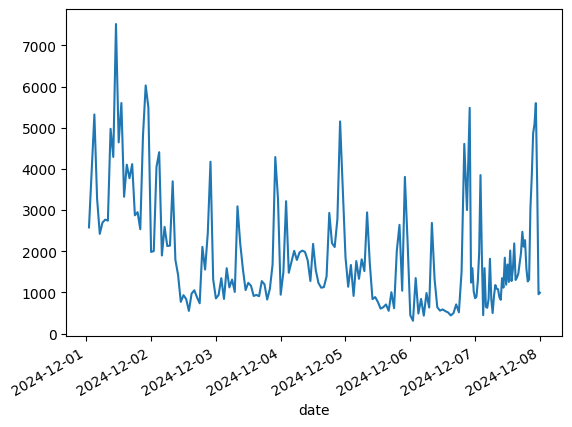

In [31]:
df['value'].plot()